<a href="https://colab.research.google.com/github/haru1489248/nlp-100-nock/blob/main/section_59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 59. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import KeyedVectors
from pathlib import Path
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

### google drive をマウントして使えるようにする

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 今いるディレクトリを確認する
### ディレクトリ内にあるフォルダ、ファイルを確認する

In [ ]:
!pwd

/content


In [ ]:
!ls /content/drive/MyDrive

'Colab Notebooks'   GoogleNews-vectors-negative300.bin.gz   questions-words.txt


### T-SNEのモジュールをインポートする

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model_src = Path('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz')

In [ ]:
data_src = Path('/content/drive/MyDrive/questions-words.txt')

In [ ]:
vectors = KeyedVectors.load_word2vec_format(model_src, binary=True)

### gensimからモデルを取り出している
モデルはバイナリ形式とテキスト形式のに種類で保存されている
| 形式 | 拡張子 | 特徴 | 設定 |
|------|--------|------|------|
| **バイナリ形式** | `.bin` | サイズ小さい、読み込み速い | `binary=True` |
| **テキスト形式** | `.txt` | 人間が読める、サイズ大きい | `binary=False` |

バイナリ形式の場合はbinary=Trueを設定しないといけない

国

### 国名セクション

In [ ]:
target_section = ["capital-common-countries", "capital-world"]

In [ ]:
data = []
words = []
for target in target_section:
    with open(data_src, 'r', encoding='utf-8') as f:
       for line in f:
           line = line.split()
           if line[1].startswith(target):
               current_section = line[1]
           elif line and current_section == target:
               if len(line) == 4:
                   for word in line:
                       data.append(vectors[word])
                       words.append(word)

In [ ]:
tsne = TSNE(n_components=2, random_state=42, metric='cosine')

In [ ]:
np_data = np.array(data)

In [ ]:
reduced = tsne.fit_transform(np_data)

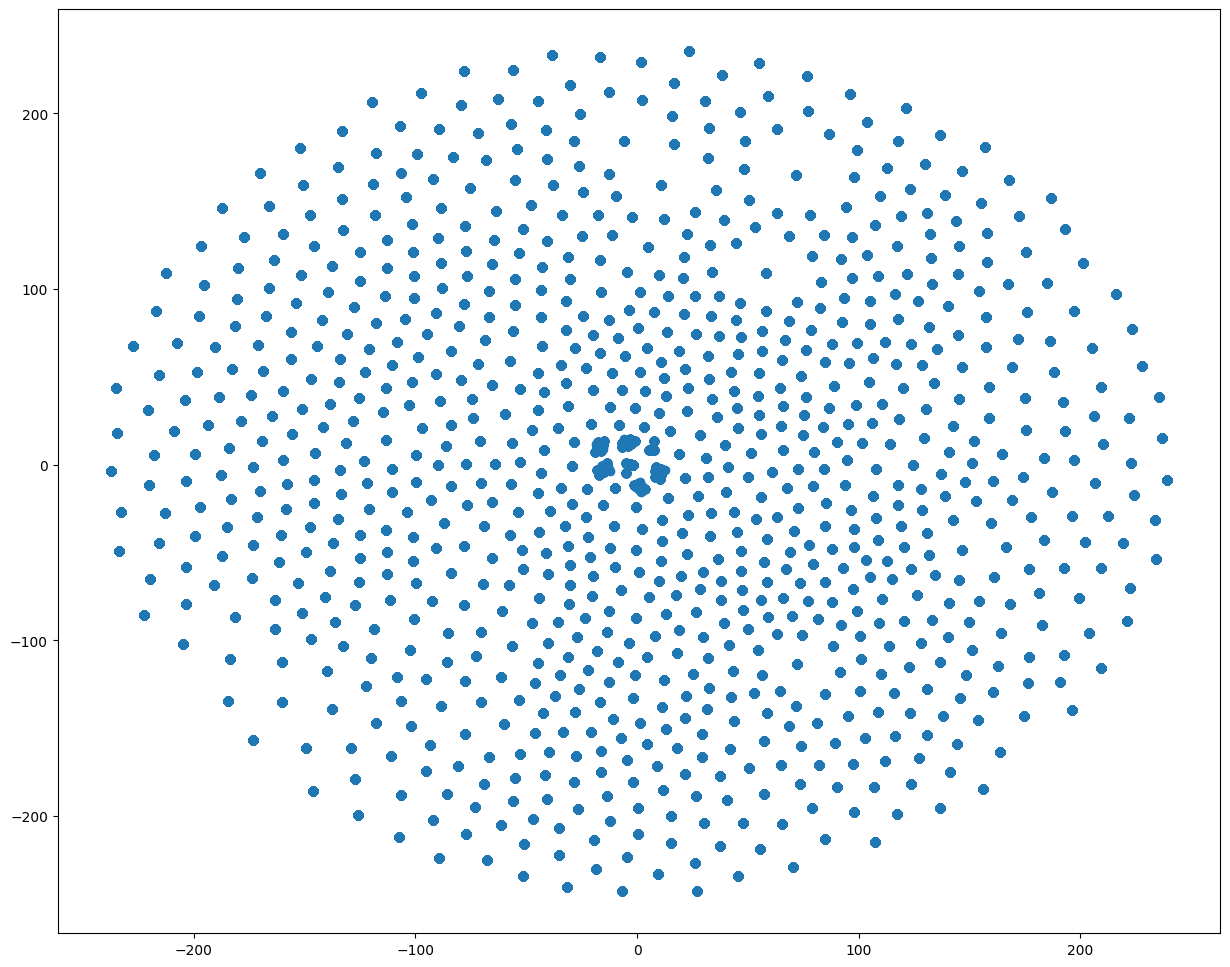

In [ ]:
plt.figure(figsize=(15, 12))
plt.scatter(reduced[:, 0], reduced[:, 1])

In [ ]:
for i, word in enumerate(words):
  plt.annotate(word, (reduced[i, 0], reduced[i, 1]), fontsize=8)

In [ ]:
plt.title('t-SNE: Country Word Vectors')

In [ ]:
plt.show